In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
data = pd.read_csv("SDP-03.csv")
data.head()

,id,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,1,9,5,3,2,2,8,3,0.16,4,...,10,0.10,36,66,21,17,31,19.05,19,N
1,2,19,3,1,2,0,4,2,0.06,2,...,23,0.04,66,69,34,12,55,5.71,35,N
2,3,0,9,0,0,0,10,5,0.56,2,...,9,0.50,10,21,7,9,10,0.00,9,N
3,4,2,15,2,1,9,24,8,0.19,10,...,18,0.15,67,120,43,19,54,19.61,42,N
4,5,5,5,1,0,0,8,3,0.15,4,...,9,0.12,25,46,17,14,26,0.00,20,N


In [47]:
import seaborn as sns # statistical data visualization

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go


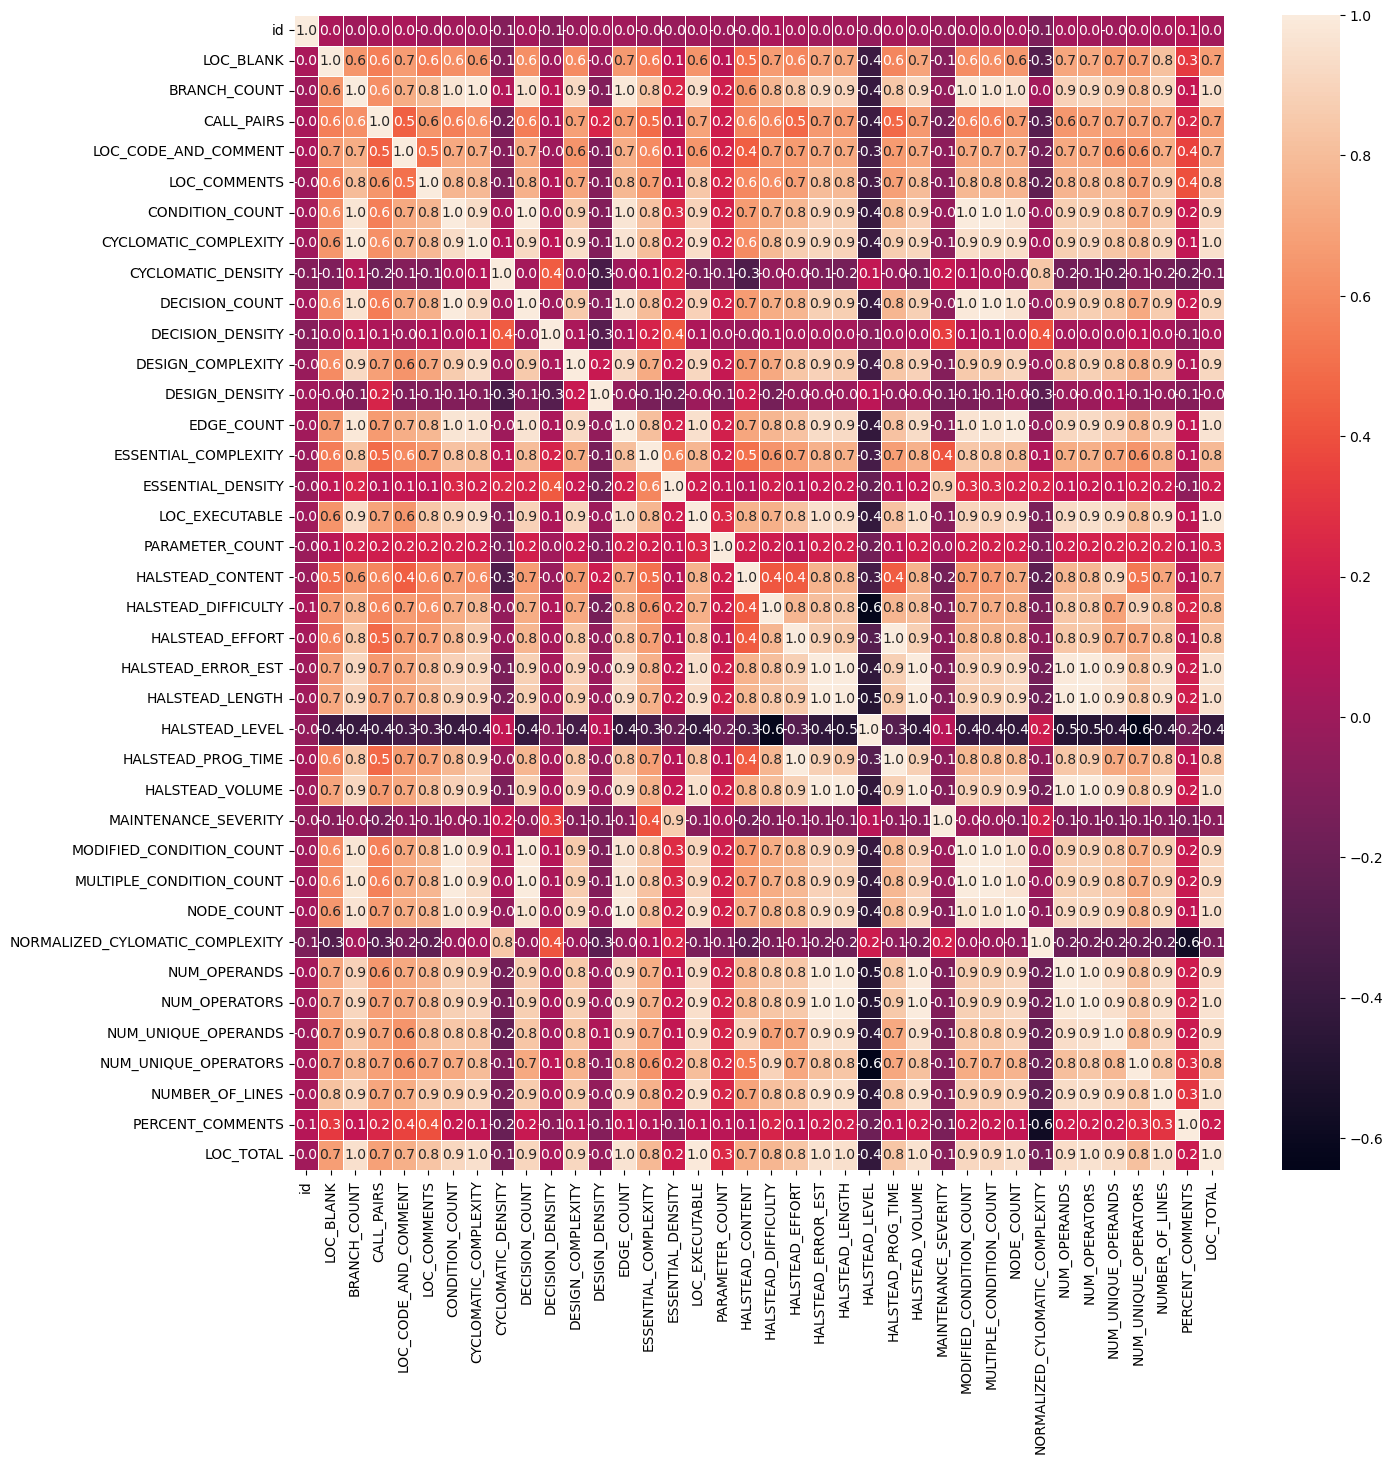

In [48]:
#heatmap

f,ax = plt.subplots(figsize = (15, 15))
sns.heatmap(data.corr(), annot = True, linewidths = .5, fmt = '.1f')
plt.show()

In [49]:
df=data.copy()

In [50]:
X =df.drop(["Defective"],axis=1)
X.head()

,id,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,...,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL
0,1,9,5,3,2,2,8,3,0.16,4,...,4,10,0.10,36,66,21,17,31,19.05,19
1,2,19,3,1,2,0,4,2,0.06,2,...,2,23,0.04,66,69,34,12,55,5.71,35
2,3,0,9,0,0,0,10,5,0.56,2,...,7,9,0.50,10,21,7,9,10,0.00,9
3,4,2,15,2,1,9,24,8,0.19,10,...,12,18,0.15,67,120,43,19,54,19.61,42
4,5,5,5,1,0,0,8,3,0.15,4,...,4,9,0.12,25,46,17,14,26,0.00,20


In [51]:
y = df[["Defective"]]
y.head()

,Defective
0,N
1,N
2,N
3,N
4,N


In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [54]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning Models
from sklearn import svm  
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

# Model Evaluation Libraries
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
# SVM Classifier

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc_model = SVC()
svc_model.fit(x_train,y_train)
svc_pred = svc_model.predict(x_test)

#Summary of the predictions made by the classifier
print(classification_report(y_test, svc_pred))
print(confusion_matrix(y_test, svc_pred))
print("ACC: ",accuracy_score(svc_pred,y_test))


svc_score = accuracy_score(svc_pred,y_test)*100
print('Overall Accuracy of SVM:',svc_score)

E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           N       0.90      1.00      0.95        89
           Y       0.00      0.00      0.00        10

    accuracy                           0.90        99
   macro avg       0.45      0.50      0.47        99
weighted avg       0.81      0.90      0.85        99

[[89  0]
 [10  0]]
ACC:  0.898989898989899
Overall Accuracy of SVM: 89.8989898989899


E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [56]:
# Logistic Regression



LR = LogisticRegression()
LR.fit(x_train,y_train)

lr_pred = LR.predict(x_test)

#Summary of the predictions made by the classifier
print(classification_report(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))
print("ACC: ",accuracy_score(lr_pred,y_test))


lr_score=accuracy_score(lr_pred,y_test)*100

print('Overall Accuracy of Logistic Regression:',lr_score)

E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



              precision    recall  f1-score   support

           N       0.91      0.97      0.93        89
           Y       0.25      0.10      0.14        10

    accuracy                           0.88        99
   macro avg       0.58      0.53      0.54        99
weighted avg       0.84      0.88      0.85        99

[[86  3]
 [ 9  1]]
ACC:  0.8787878787878788
Overall Accuracy of Logistic Regression: 87.87878787878788


E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [57]:
# Decision Tree

DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)

dt_pred = DT.predict(x_test)

#Summary of the predictions made by the classifier

print(classification_report(y_test, dt_pred))

print(confusion_matrix(y_test, dt_pred))
print("ACC: ",accuracy_score(dt_pred,y_test))



dt_score=accuracy_score(dt_pred,y_test)*100


print('Overall Accuracy of Decision Tree:',dt_score)

              precision    recall  f1-score   support

           N       0.93      0.84      0.88        89
           Y       0.22      0.40      0.29        10

    accuracy                           0.80        99
   macro avg       0.57      0.62      0.58        99
weighted avg       0.85      0.80      0.82        99

[[75 14]
 [ 6  4]]
ACC:  0.797979797979798
Overall Accuracy of Decision Tree: 79.7979797979798


In [58]:
# Random Forest

RF = RandomForestClassifier()
RF.fit(x_train,y_train)

rf_pred = RF.predict(x_test)

#Summary of the predictions made by the classifier

print(classification_report(y_test, rf_pred))

print(confusion_matrix(y_test, rf_pred))
print("ACC: ",accuracy_score(rf_pred,y_test))

rf_score=accuracy_score(rf_pred,y_test)*100

print('Overall Accuracy of Random Forest:',rf_score)

E:\anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



              precision    recall  f1-score   support

           N       0.91      0.99      0.95        89
           Y       0.50      0.10      0.17        10

    accuracy                           0.90        99
   macro avg       0.70      0.54      0.56        99
weighted avg       0.87      0.90      0.87        99

[[88  1]
 [ 9  1]]
ACC:  0.898989898989899
Overall Accuracy of Random Forest: 89.8989898989899


In [ ]:
from sklearn.neural_network import MLPClassifier

In [133]:
# MLP- DL Method

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(x_train,y_train)
naive_bayes_pred = naive_bayes_model.predict(x_test)

#Summary of the predictions made by the classifier

print(classification_report(y_test, naive_bayes_pred))

print(confusion_matrix(y_test, naive_bayes_pred))
print("ACC: ",accuracy_score(naive_bayes_pred,y_test))

naive_bayes_score = accuracy_score(naive_bayes_pred,y_test)*100
print('Overall Accuracy of Naive Bayes:',naive_bayes_score)

              precision    recall  f1-score   support

           N       0.85      0.39      0.54        28
           Y       0.15      0.60      0.24         5

    accuracy                           0.42        33
   macro avg       0.50      0.50      0.39        33
weighted avg       0.74      0.42      0.49        33

[[11 17]
 [ 2  3]]
ACC:  0.42424242424242425
Overall Accuracy of Naive Bayes: 42.42424242424242


E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [132]:
clf = MLPClassifier(hidden_layer_sizes=(150,100,50),max_iter=300,activation = 'relu',solver='adam',random_state=1)
clf.fit(x_train, y_train)
    
mpl_pred = clf.predict(x_test)

#Summary of the predictions made by the classifier

print(classification_report(y_test, mpl_pred))

print(confusion_matrix(y_test, mpl_pred))
print("ACC: ",accuracy_score(mpl_pred,y_test))

mpl_pred_score = accuracy_score(mpl_pred,y_test)*100
print('Overall Accuracy of MLP:',mpl_pred_score)

E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



              precision    recall  f1-score   support

           N       0.85      1.00      0.92        28
           Y       0.00      0.00      0.00         5

    accuracy                           0.85        33
   macro avg       0.42      0.50      0.46        33
weighted avg       0.72      0.85      0.78        33

[[28  0]
 [ 5  0]]
ACC:  0.8484848484848485
Overall Accuracy of MLP: 84.84848484848484


E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
# KNN 
k_range = range(1,26)
scores = []
for k in k_range :
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(x_train,y_train)
    pred = KNN.predict(x_test)
    scores.append(accuracy_score(pred,y_test)*100)
    
print(pd.DataFrame(scores))

E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

E:\anaconda\envs\ten

            0
0   73.737374
1   87.878788
2   81.818182
3   87.878788
4   85.858586
5   89.898990
6   89.898990
7   89.898990
8   89.898990
9   89.898990
10  89.898990
11  89.898990
12  89.898990
13  89.898990
14  89.898990
15  89.898990
16  89.898990
17  89.898990
18  89.898990
19  89.898990
20  89.898990
21  89.898990
22  89.898990
23  89.898990
24  89.898990


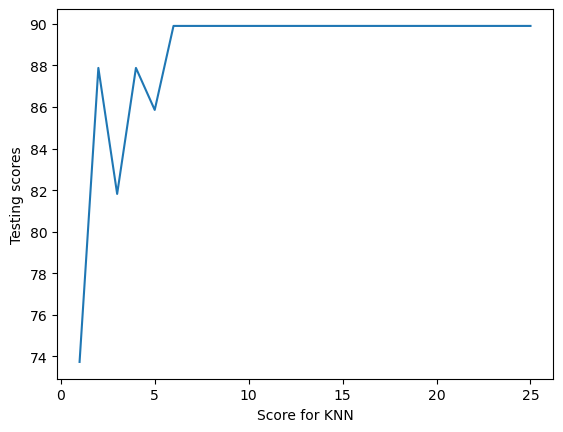

In [62]:
plt.plot(k_range,scores)
plt.xlabel("Score for KNN")
plt.ylabel("Testing scores")
plt.show()

In [140]:
from sklearn.linear_model import Perceptron

In [139]:
#Perceptron

clf = Perceptron()
clf.fit(x_train, y_train)
clf_pred = clf.predict(x_test)

#Summary of the predictions made by the classifier

print(classification_report(y_test, clf_pred))

print(confusion_matrix(y_test, clf_pred))
print("ACC: ",accuracy_score(clf_pred,y_test))

clf_score = accuracy_score(clf_pred,y_test)*100
print('Overall Accuracy of Perceptron:',clf_score)


              precision    recall  f1-score   support

           N       0.84      0.96      0.90        28
           Y       0.00      0.00      0.00         5

    accuracy                           0.82        33
   macro avg       0.42      0.48      0.45        33
weighted avg       0.72      0.82      0.76        33

[[27  1]
 [ 5  0]]
ACC:  0.8181818181818182
Overall Accuracy of Perceptron: 81.81818181818183


E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [134]:
def plotCorrelationMatrix(df, graphWidth):
    #filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    #plt.title(f'Correlation Matrix for {df}', fontsize=15)
    plt.show()

E:\anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only



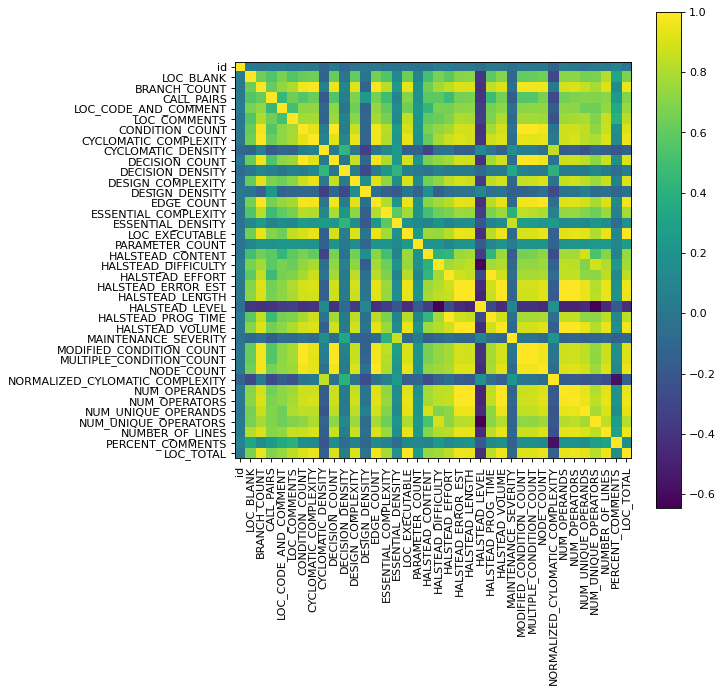

In [135]:
plotCorrelationMatrix(df1, 8)

In [73]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

E:\anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only



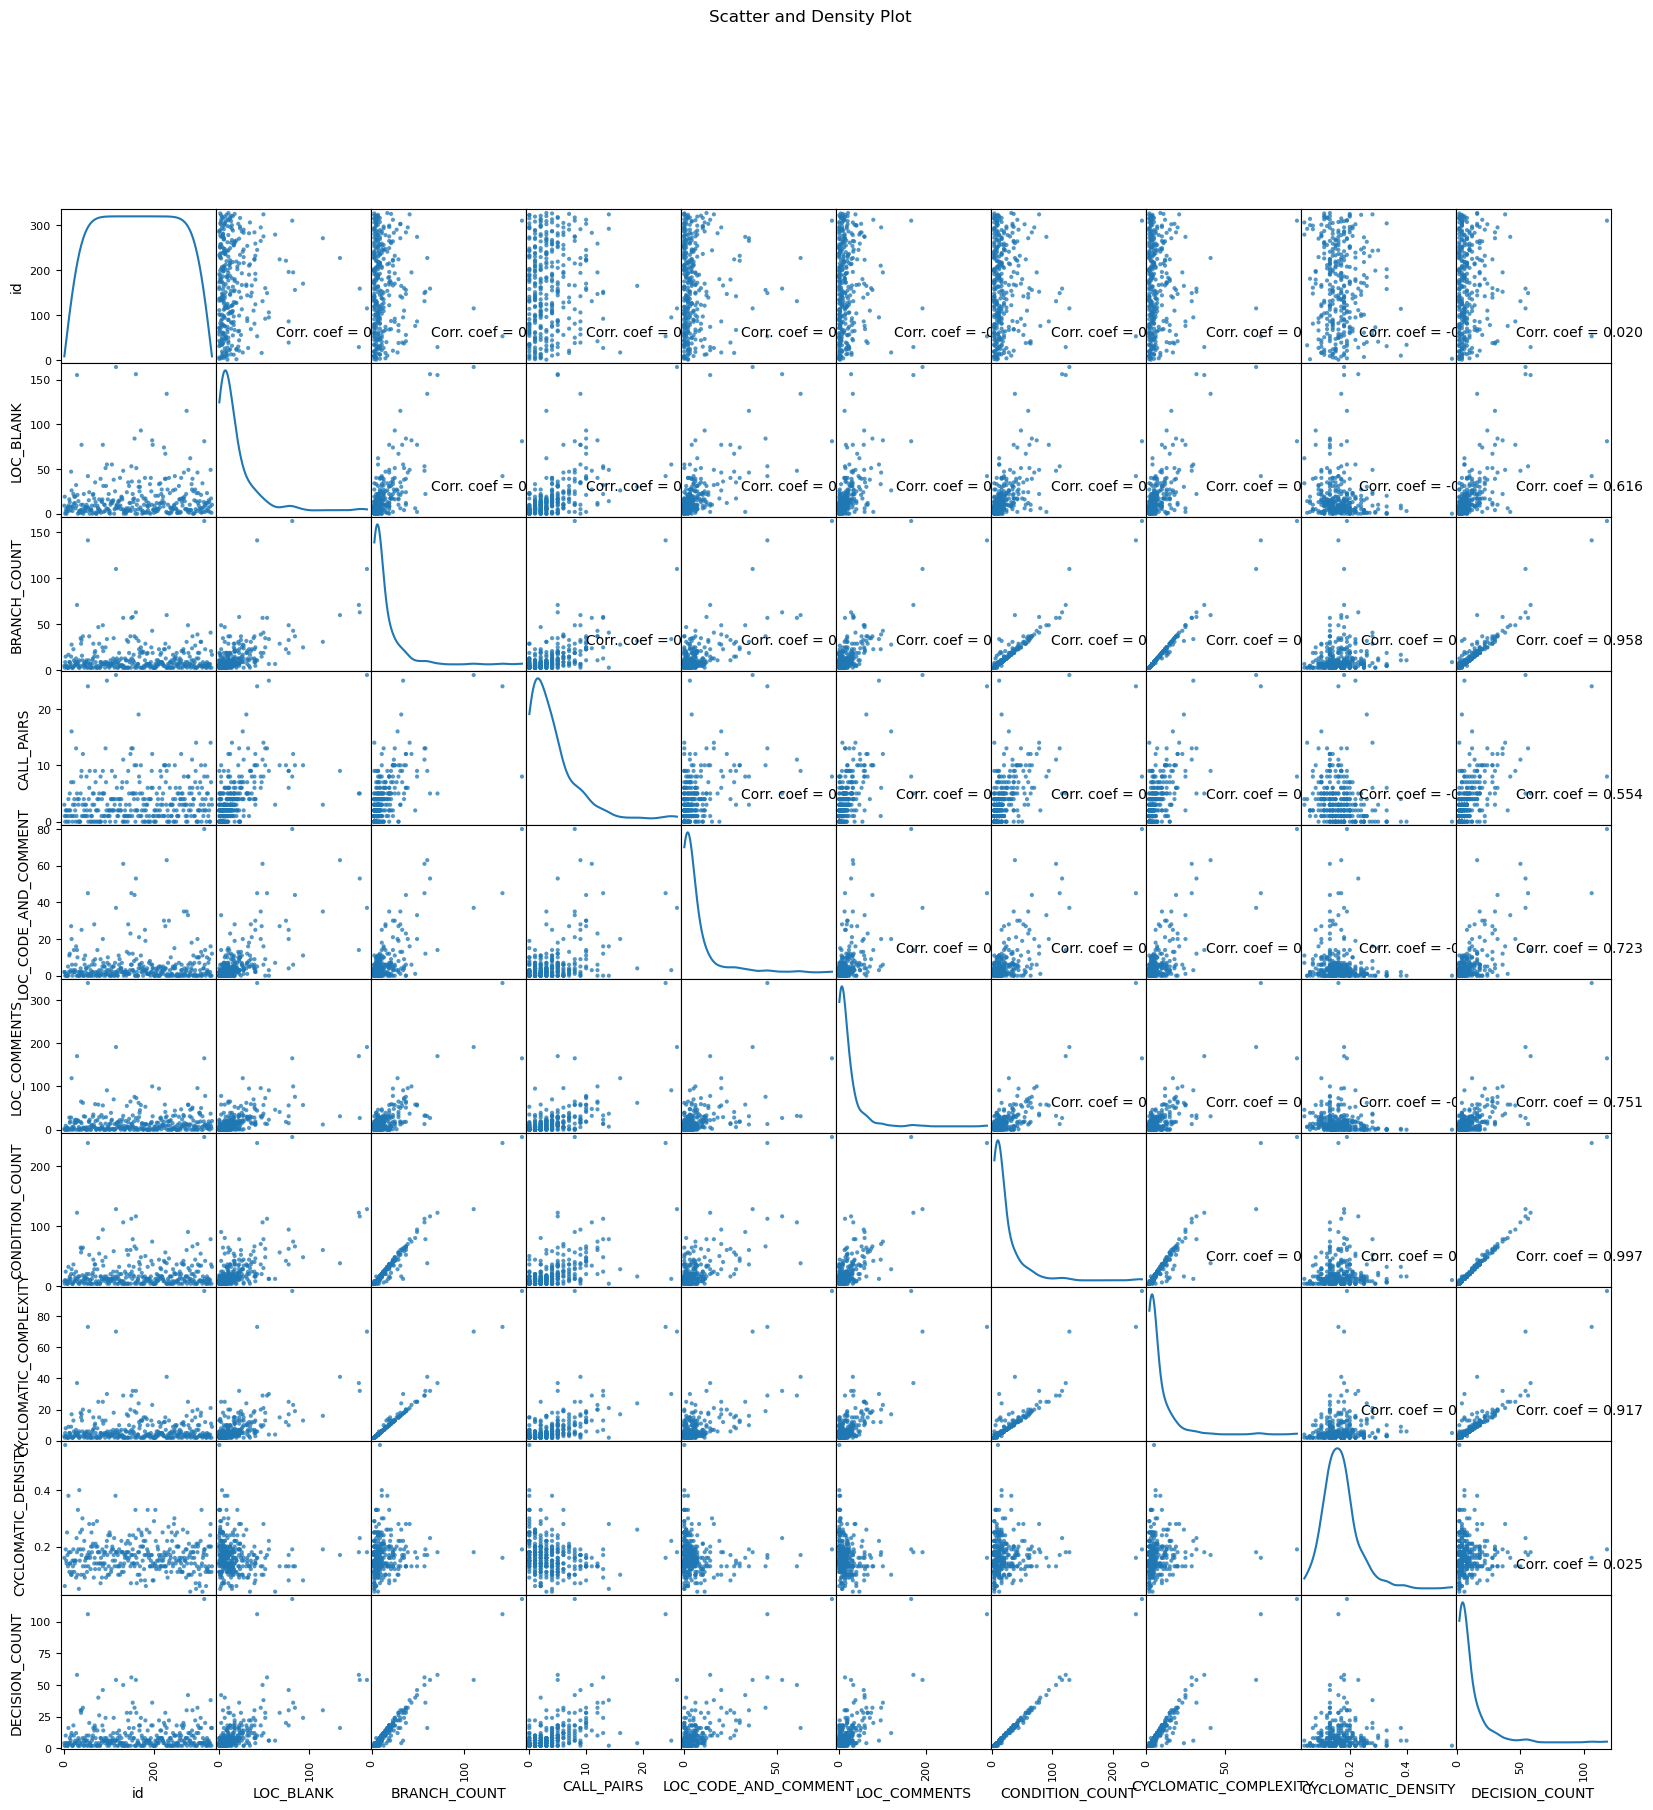

In [74]:
plotScatterMatrix(df1, 20, 10)

In [84]:
import numpy
import keras.models
import tensorflow
from keras.models import Sequential

In [143]:
from __future__ import print_function
import keras
#from keras.datasets import cifar10
#from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

from keras.layers import Dense,Dropout,Conv2D,Conv1D,Flatten,MaxPool2D
from keras.layers import Activation



In [142]:
from imblearn.over_sampling import SMOTE